#                                                 Airlines Customer Satisfication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [2]:
check = pd.read_csv('train.csv')

### Data Cleaning

In [3]:
# remove the columns full of null values
data = check.dropna(axis=1)

In [4]:
data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [5]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['satisfaction'])

In [8]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Target
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,neutral or dissatisfied,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,neutral or dissatisfied,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,satisfied,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,neutral or dissatisfied,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,neutral or dissatisfied,0
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,satisfied,1
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,neutral or dissatisfied,0
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,neutral or dissatisfied,0


In [9]:
df_encoded = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

In [10]:
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({
    'satisfied':1,
    'neutral or dissatisfied':0
})
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
df_encoded['Customer Type_disloyal Customer'] = df_encoded['Customer Type_disloyal Customer'].astype(int)
df_encoded['Type of Travel_Personal Travel'] = df_encoded['Type of Travel_Personal Travel'].astype(int)
df_encoded['Class_Eco'] = df_encoded['Class_Eco'].astype(int)
df_encoded['Class_Eco Plus'] = df_encoded['Class_Eco Plus'].astype(int)

In [11]:
df_encoded

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Target,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,5,25,0,0,1,0,1,0,1
1,1,5047,25,235,3,2,3,3,1,3,...,4,1,1,0,0,1,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,5,0,1,1,0,0,0,0,0
3,3,24026,25,562,2,5,5,5,2,2,...,4,2,11,0,0,0,0,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,3,2,3,0,0,0,1,0,1,0
103900,103900,73097,49,2347,4,4,4,4,2,4,...,5,4,0,1,1,1,0,0,0,0
103901,103901,68825,30,1995,1,1,1,3,4,1,...,5,4,7,0,0,1,1,0,0,0
103902,103902,54173,22,1000,1,1,1,5,1,1,...,4,1,0,0,0,0,1,0,1,0


In [12]:
print(df_encoded.dtypes)

Unnamed: 0                           int64
id                                   int64
Age                                  int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
satisfaction                         int64
Target                               int32
Gender_Male                          int32
Customer Type_disloyal Customer      int32
Type of Tra

## Normilization
## (Min-Max Scaling)

### Xnormalized = X - Xmin / Xmax - Xmin



In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # for normalization
df_normalization = scaler.fit_transform(df_encoded)

In [14]:
df_normalized = pd.DataFrame(df_normalization)

In [15]:
df_normalized.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.540280,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,...,1.0,1.0,0.015704,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.000010,0.038852,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,...,0.8,0.2,0.000628,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.000019,0.847150,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,...,0.8,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000029,0.184980,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,...,0.8,0.4,0.006910,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000038,0.918532,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,...,0.6,0.6,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,0.000048,0.855843,0.243590,0.232027,0.6,0.8,0.4,0.2,0.2,0.4,...,0.8,0.2,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.000058,0.632219,0.512821,0.251414,0.4,0.8,0.4,0.6,0.4,0.4,...,1.0,0.4,0.005653,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,0.000067,0.742699,0.576923,0.404685,0.8,0.6,0.8,0.8,1.0,1.0,...,1.0,0.8,0.002513,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.000077,0.611985,0.435897,0.165994,0.2,0.4,0.4,0.4,0.8,0.6,...,0.2,0.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000087,0.506040,0.166667,0.207997,0.6,0.6,0.6,0.8,0.4,0.6,...,0.6,0.4,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Z- Score
 
### Xstandardized = X - μ / σ

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # for standardization
df_standardScaler = scaler.fit_transform(df_encoded)

In [17]:
df_standardScaler

array([[-1.73203414,  0.1400769 , -1.7452793 , ...,  1.49061375,
        -0.90432653,  3.58677552],
       [-1.7320008 , -1.59827564, -0.95136024, ..., -0.6708646 ,
        -0.90432653, -0.27880195],
       [-1.73196746,  1.20393531, -0.88520032, ..., -0.6708646 ,
        -0.90432653, -0.27880195],
       ...,
       [ 1.73196746,  0.10412203, -0.62056063, ..., -0.6708646 ,
        -0.90432653, -0.27880195],
       [ 1.7320008 , -0.28697726, -1.14984   , ..., -0.6708646 ,
         1.10579527, -0.27880195],
       [ 1.73203414, -0.06291997, -0.8190404 , ..., -0.6708646 ,
        -0.90432653, -0.27880195]])

## Exploratory Data Analysis (EDA)

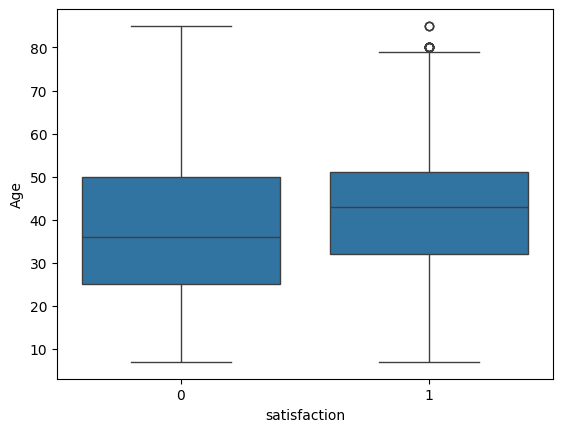

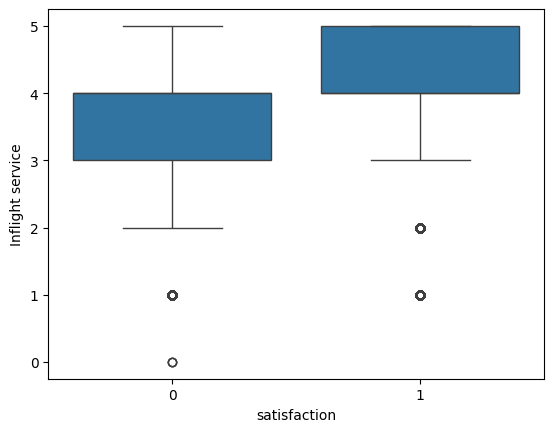

In [18]:
sns.boxplot(x='satisfaction', y='Age', data=df_encoded)
plt.show()

sns.boxplot(x='satisfaction', y='Inflight service', data=df_encoded)
plt.show()


### Understand the distribution of the data.

### Summary statistics

In [19]:
# print("Summary statistics for all numerical columns")
# print(data.describe())
print("Summary statistics for a specific column")
print(df_encoded['Age'].describe())

Summary statistics for a specific column
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


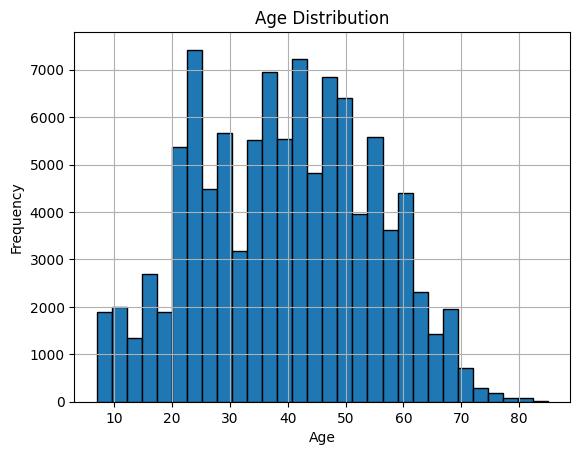

In [20]:
# Histogram for a single column
df_encoded['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# # Histograms for multiple columns
# data.hist(bins=30, figsize=(15, 10), edgecolor='black')
# plt.show()


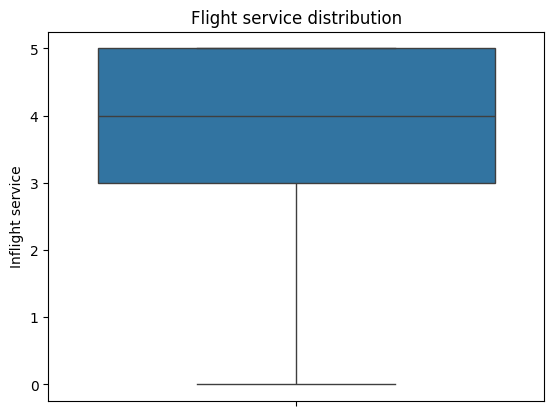

In [21]:
sns.boxplot(df_encoded['Inflight service'])
plt.title("Flight service distribution")
plt.show()

### Box plots show the spread of the data and are helpful in identifying outliers.

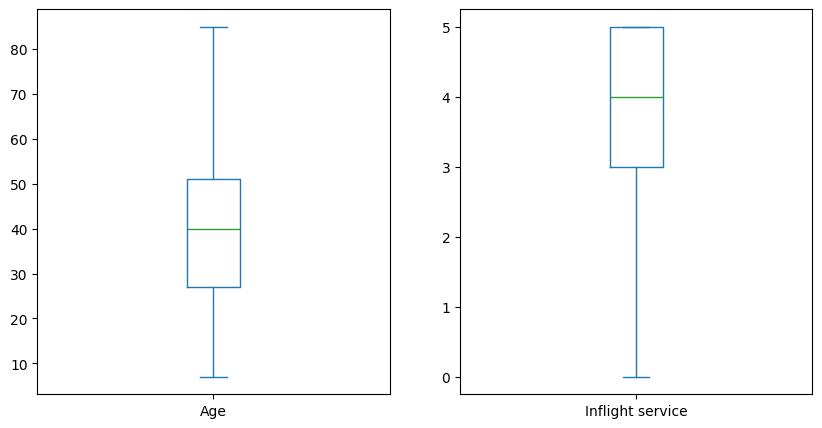

In [22]:
# Box plot for multiple columns
df_encoded[['Age', 'Inflight service']].plot(kind='box', subplots=True, layout=(1, 2), figsize=(10, 5))
plt.show()

### KDE plots are useful to visualize the probability density of a continuous variable.

C:\Users\HP\AppData\Local\Temp\ipykernel_19604\4269294475.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded['Age'], shade=True)


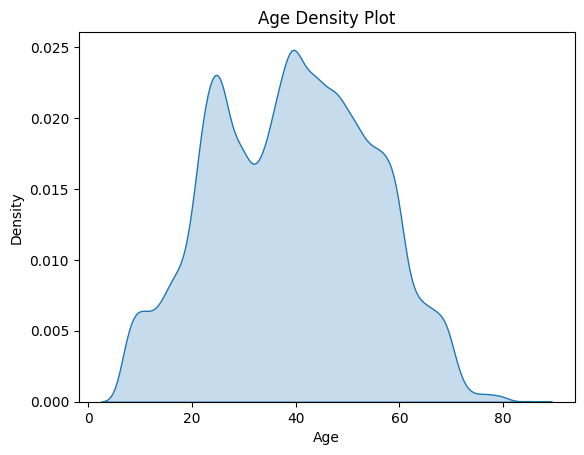

In [23]:
sns.kdeplot(df_encoded['Age'], shade=True)
plt.title("Age Density Plot")
plt.show()

### Visualize correlations between features and satisfaction.

### Heatmaps Useful for visualizing the overall correlation structure in the dataset

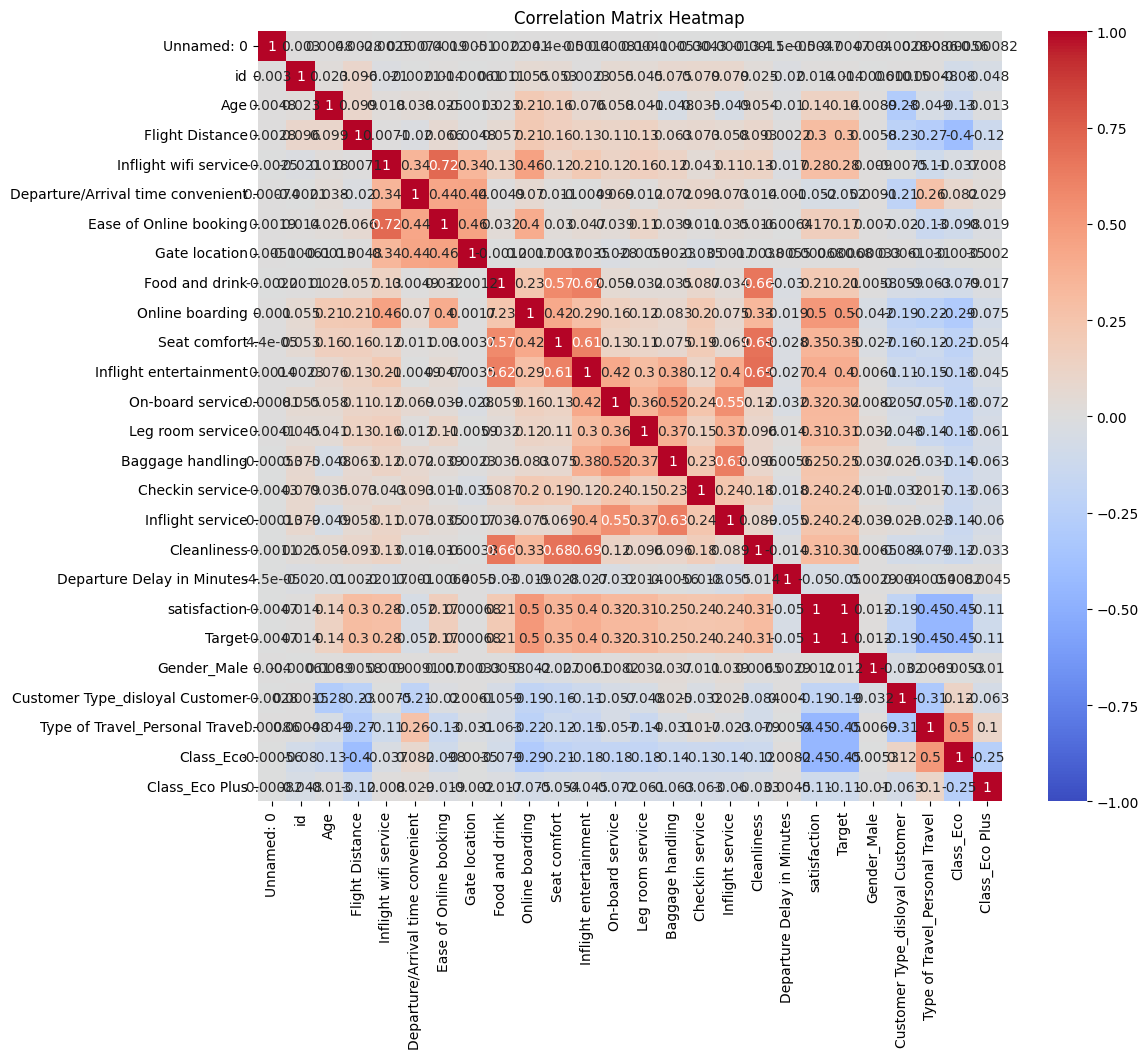

In [24]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Bar Plots: Great for understanding the specific correlation strength of each feature with the target variable.

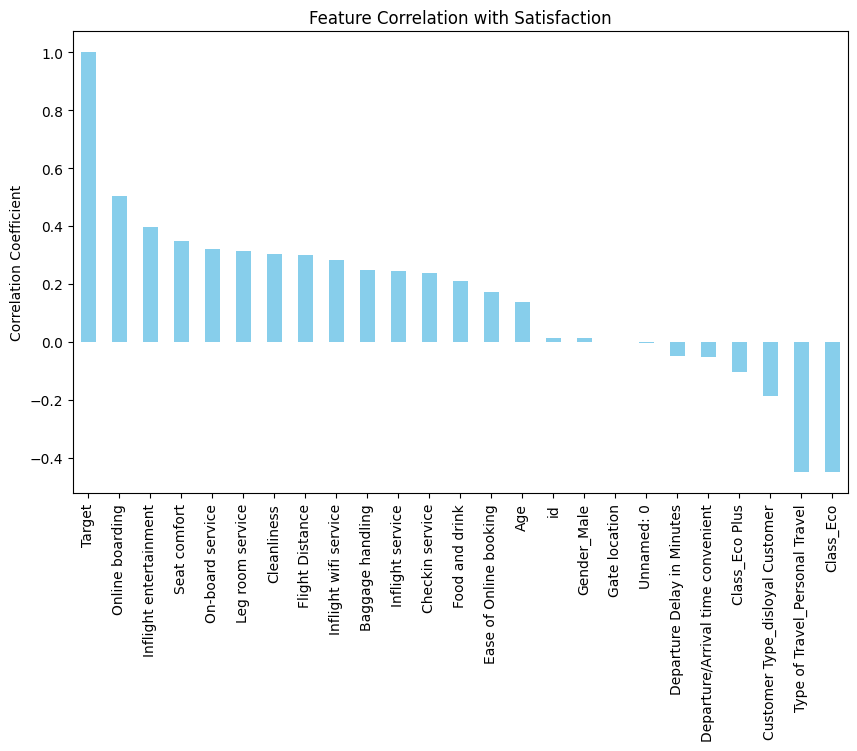

In [25]:
# Calculate the correlation of each feature with 'satisfaction'
satisfaction_corr = df_encoded.corr()['satisfaction'].sort_values(ascending=False)

# Plot the correlation values as a bar plot
plt.figure(figsize=(10, 6))
satisfaction_corr.drop('satisfaction').plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Satisfaction')
plt.ylabel('Correlation Coefficient')
plt.show()


### Pair Plots: Help visualize relationships between multiple variables and how they relate to the target variable.

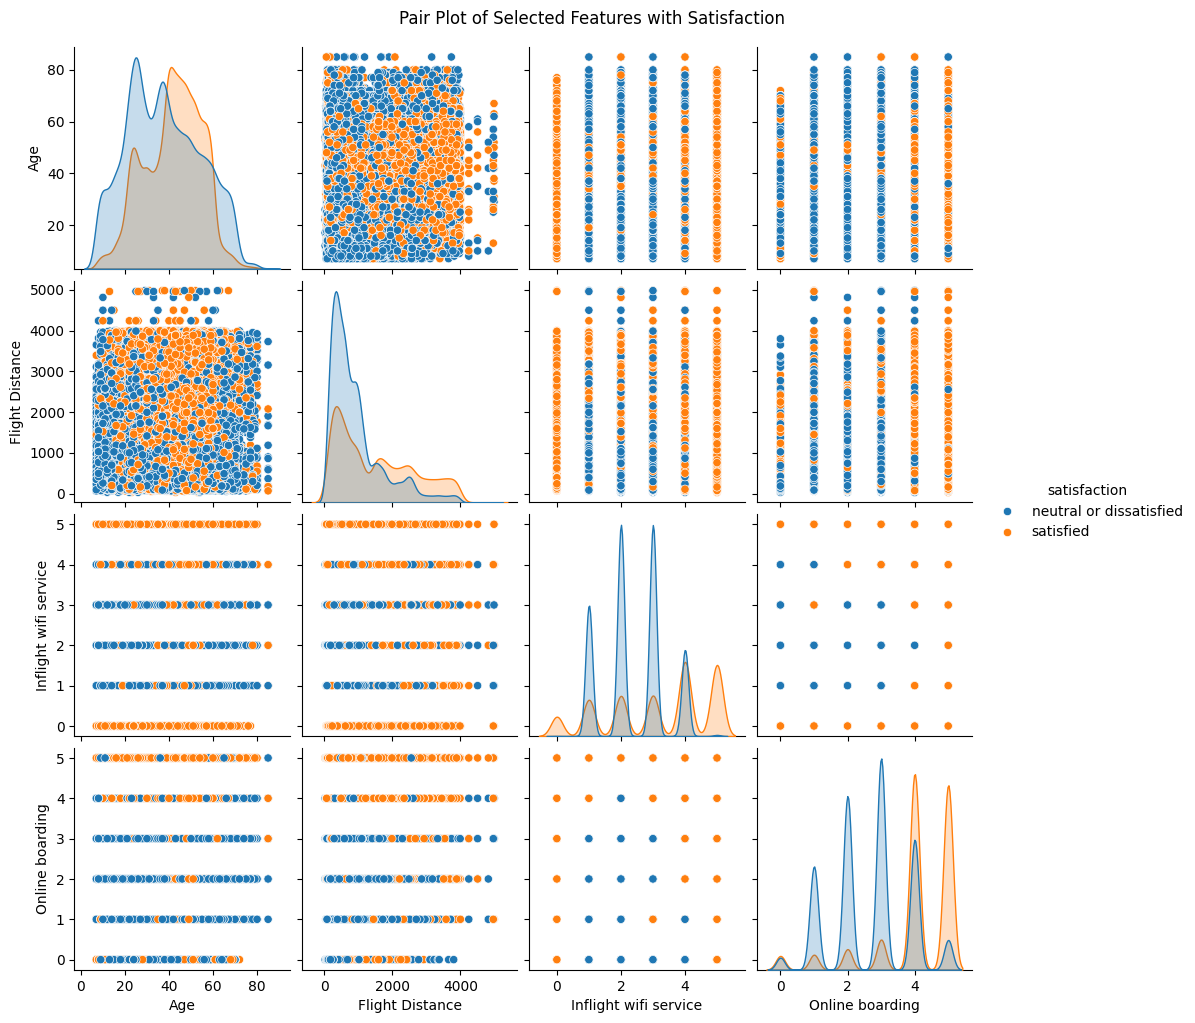

In [26]:
sns.pairplot(data[['Age', 'Flight Distance', 'Inflight wifi service', 'Online boarding', 'satisfaction']], hue='satisfaction')
plt.suptitle('Pair Plot of Selected Features with Satisfaction', y=1.02)
plt.show()


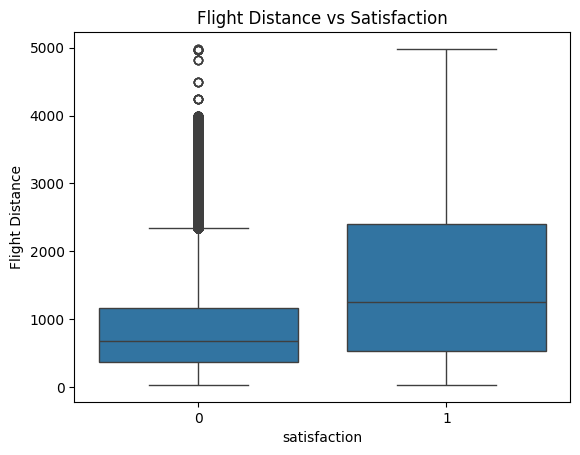

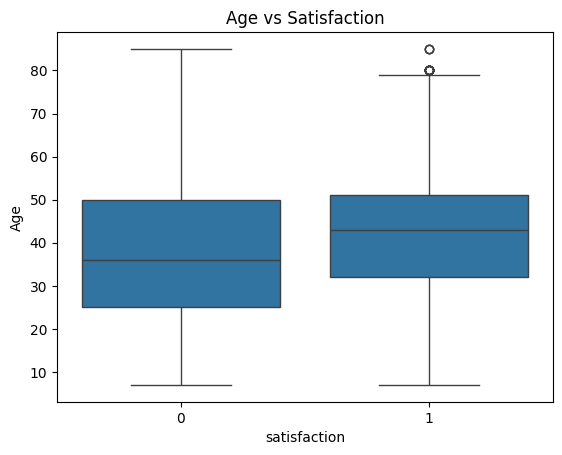

In [27]:
sns.boxplot(x='satisfaction', y='Flight Distance', data=df_encoded)
plt.title('Flight Distance vs Satisfaction')
plt.show()

sns.boxplot(x='satisfaction', y='Age', data=df_encoded)
plt.title('Age vs Satisfaction')
plt.show()


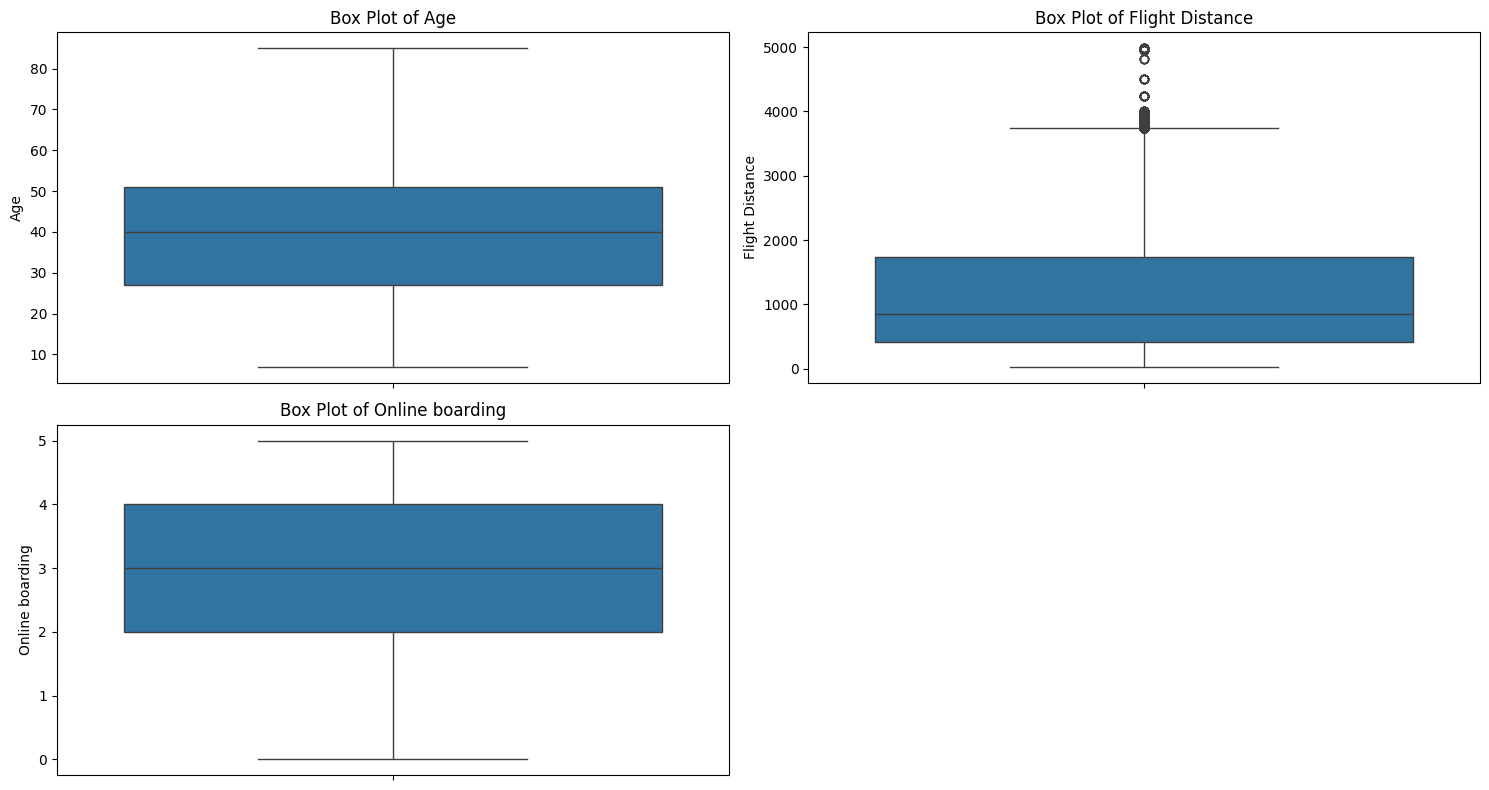

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize potential outliers in numerical features
numerical_features = ['Age', 'Flight Distance', 'Online boarding'] # Add other numerical features as needed

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)  # Adjust layout based on the number of features
    sns.boxplot(data=df_encoded[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


### Model Building

In [29]:
x = df_encoded.drop(columns=['satisfaction'])
y = df_encoded['satisfaction']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
print(f'x_train: {x_train.shape} y_train: {y_train.shape}')
print(f'x_test: {x_test.shape} y_test: {y_test.shape}')

x_train: (83123, 25) y_train: (83123,)
x_test: (20781, 25) y_test: (20781,)


### Machine Learning algorithm (Handles missing data, highly flexible with various hyperparameters, often yields strong performance)

In [32]:
from xgboost import XGBClassifier

In [33]:
model_xgb = XGBClassifier(use_label= False, eval_metric='logloss', random_state=42)
model_xgb.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [34]:
y_predict = model_xgb.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


### Use cross-validation to assess the model's performance more robustly.

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [37]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [38]:
model_xgb = xgb.XGBClassifier(user_label_encoder=False, eval_metric='logloss', random=42)

In [39]:
score = cross_val_score(model_xgb, x, y, cv=kf, scoring='accuracy')

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random", "user_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random", "user_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random", "u

In [40]:
print(f'Cross-Validation Accuracy Scores: {score}')
print(f'Cross-Validation Accuracy Mean Scores: {score.mean():.2f}')
print(f'Cross-Validation Accuracy Min Scores: {score.min():.2f}')
print(f'Cross-Validation Accuracy Max Scores: {score.max():.2f}')

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Cross-Validation Accuracy Mean Scores: 1.00
Cross-Validation Accuracy Min Scores: 1.00
Cross-Validation Accuracy Max Scores: 1.00


### Fine-tune hyperparameters using GridSearchCV or RandomizedSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [20, 50],           # Number of trees
    'learning_rate': [0.01, 0.1],       # Learning rate
    'max_depth': [3, 5],                # Maximum depth of the trees
    'subsample': [0.8],                 # Subsample ratio
    'colsample_bytree': [0.8],          # Column sample ratio by tree
    'gamma': [0, 0.1],                  # Minimum loss reduction 
    'min_child_weight': [1, 3]          # Minimum sum of instance weight in a child
}

In [42]:
grid_search = GridSearchCV(estimator=model_xgb,            # Your XGBoost model
                           param_grid=param_grid,          # Simplified parameter grid
                           scoring='accuracy',             # Scoring metric # Scoring metric
                           cv = 5,                         # Number of cross-validation folds
                           verbose = 1,                    # Verbosity level (1 for minimal output)
                           n_jobs =-1)                     # Use all available cores
grid_search.fit(x,y)
print("Best Hyperparameters:",grid_search.best_params_)
print("Best Cross-Validation Score:",grid_search.best_score_)
                          

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Score: 1.0


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random", "user_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 20, 'subsample': 0.8}
Best Cross-Validation Score: 1.0

Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 60, 'subsample': 0.6}
Best Cross-Validation Score: 1.0

Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best Cross-Validation Score: 1.

In [44]:
print(df_encoded)

        Unnamed: 0      id  Age  Flight Distance  Inflight wifi service  \
0                0   70172   13              460                      3   
1                1    5047   25              235                      3   
2                2  110028   26             1142                      2   
3                3   24026   25              562                      2   
4                4  119299   61              214                      3   
...            ...     ...  ...              ...                    ...   
103899      103899   94171   23              192                      2   
103900      103900   73097   49             2347                      4   
103901      103901   68825   30             1995                      1   
103902      103902   54173   22             1000                      1   
103903      103903   62567   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                             

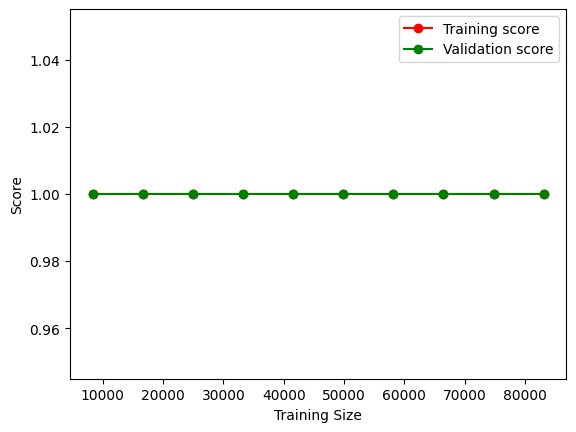

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_xgb, x, y, 
                                                        cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Plotting
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()
